In [102]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei' # 设置中文显示
%matplotlib inline

In [103]:
# 数据清洗
data = pd.read_csv('data_wuliu.csv', encoding='gbk')
data.info()

# 读取数据
data = pd.read_csv('data_wuliu.csv', encoding='gbk')
print("原始数据概况：")
print(data.info())

# 数据清洗
data = (data
        .drop_duplicates(keep='first')  # 删除重复记录
        .dropna(how='any')             # 删除含NA的行（可根据需求调整）
        .drop(columns=['订单行'])       # 删除指定列
        .reset_index(drop=True)         # 重置索引
       )

# 检查清洗后结果
print("\n清洗后数据概况：")
print(data.info())
print(f"清洗后数据行数: {len(data)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1159 non-null   object 
 1   订单行     1161 non-null   int64  
 2   销售时间    1161 non-null   object 
 3   交货时间    1161 non-null   object 
 4   货品交货状况  1159 non-null   object 
 5   货品      1161 non-null   object 
 6   货品用户反馈  1161 non-null   object 
 7   销售区域    1161 non-null   object 
 8   数量      1157 non-null   float64
 9   销售金额    1161 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 90.8+ KB
原始数据概况：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1159 non-null   object 
 1   订单行     1161 non-null   int64  
 2   销售时间    1161 non-null   object 
 3   交货时间    1161 non-null   object 
 4   货品交货状况  1159 non-null   object 
 5   货品     

In [104]:
# 取出销售金额列，对每个数据进行清洗
# 编写自定义过滤函数，删除逗号，转成float，删除元或者万元，对万元乘以一万
def data_deal(number):
    """
    将带有'万元'或'元'的字符串转换为浮点数。
    - '万元': 去掉单位和逗号，转为float后乘以10000
    - '元': 去掉单位和逗号，转为float
    - 其他格式: 尝试直接转为float，若失败则返回None
    """
    if isinstance(number, str):  # 确保输入是字符串
        if '万元' in number:
            number_new = float(number[:number.find('万元')].replace(',', '')) * 10000
        elif '元' in number:
            number_new = float(number.replace('元', '').replace(',', ''))
        else:
            try:
                number_new = float(number.replace(',', ''))  # 处理纯数字带逗号的情况
            except ValueError:
                return None  # 无效格式返回None
    else:
        try:
            number_new = float(number)  # 处理直接传入的数值
        except (ValueError, TypeError):
            return None  # 无效输入返回None
    return number_new

# 测试代码
test_cases = ['12,345.67万元', '5,678元', '123,456', 'abc', 12345]
for test in test_cases:
    result = data_deal(test)
    print(f"输入: {test}, 输出: {result}")


data['销售金额']=data['销售金额'].apply(data_deal)
data


输入: 12,345.67万元, 输出: 123456700.0
输入: 5,678元, 输出: 5678.0
输入: 123,456, 输出: 123456.0
输入: abc, 输出: None
输入: 12345, 输出: 12345.0


,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,105275.0
1,P096826,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000.0
2,P097435,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,685877.0
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,12958.0
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,3239.0
...,...,...,...,...,...,...,...,...,...
1141,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,20041.0
1142,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,7944.0
1143,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,19408.0
1144,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,3218.0


In [70]:
# 销售金额==0，采用删除方法，因为数据量很小
data = data[data['销售金额']!=0]
data.describe()

,销售时间,数量,销售金额,月份
count,1145,1145.000000,1.145000e+03,1145.000000
mean,2016-09-28 19:30:51.877729280,76.134934,1.224557e+05,9.310917
min,2016-07-01 00:00:00,1.000000,5.100000e+01,7.000000
25%,2016-08-15 00:00:00,1.000000,2.946000e+03,8.000000
50%,2016-09-30 00:00:00,1.000000,9.486000e+03,9.000000
75%,2016-11-05 00:00:00,4.000000,3.577300e+04,11.000000
max,2016-12-30 00:00:00,11500.000000,3.270000e+07,12.000000
std,NaN,589.669861,1.115081e+06,1.672305


In [105]:
# 数据规整
# 假设之前有过滤操作
data = data[data['销售金额'] != 0].copy()  # 创建副本

# 数据规整
data['销售时间'] = pd.to_datetime(data['销售时间'])
data['月份'] = data['销售时间'].apply(lambda x: x.month)

data

,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额,月份
0,P096311,2016-07-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,105275.0,7
1,P096826,2016-08-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000.0,8
2,P097435,2016-07-30,2016-9-30,按时交货,货品1,返修,华南,2.0,685877.0,7
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,12958.0,11
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,3239.0,11
...,...,...,...,...,...,...,...,...,...,...
1141,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,20041.0,12
1142,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,7944.0,12
1143,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,19408.0,12
1144,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,3218.0,12


In [106]:
# 配送服务是否存在问题
data['货品交货状况'] = data['货品交货状况'].str.strip()
data1 = data.groupby(['月份','货品交货状况']).size().unstack()
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
data1
# 按时交货率第四季度低于第三季度，猜测是年底气候原因

货品交货状况,按时交货,晚交货,按时交货率
月份,,,
7,189,13,0.935644
8,218,35,0.861660
9,122,9,0.931298
10,238,31,0.884758
11,101,25,0.801587
12,146,18,0.890244


In [107]:
#销售区域维度
data1 = data.groupby(['销售区域','货品交货状况']).size().unstack()
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
print(data1.sort_values(by = '按时交货率',ascending=False))
# 西北存在突出的延时交货问题

货品交货状况  按时交货  晚交货     按时交货率
销售区域                       
泰国       183    4  0.978610
马来西亚     310   16  0.950920
华南        10    1  0.909091
华北       226   27  0.893281
华东       268   39  0.872964
西北        17   44  0.278689


In [108]:
# 货品维度分析
data1 = data.groupby(['货品','货品交货状况']).size().unstack()
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
print(data1.sort_values(by = '按时交货率',ascending=False))
# 货品4晚交货情况严重

货品交货状况  按时交货  晚交货     按时交货率
货品                         
货品5      183    4  0.978610
货品6      309    7  0.977848
货品1       27    2  0.931034
货品3      212   26  0.890756
货品2      269   48  0.848580
货品4       14   44  0.241379


In [109]:
# 货品和销售区域结合
data1 = data.groupby(['货品','销售区域','货品交货状况']).size().unstack()
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
print(data1.sort_values(by = '按时交货率',ascending=False))
#销售区域：最差在西北。货品：最差的是货品2

货品交货状况     按时交货   晚交货     按时交货率
货品  销售区域                       
货品5 泰国    183.0   4.0  0.978610
货品6 马来西亚  309.0   7.0  0.977848
货品1 华北     14.0   1.0  0.933333
    华南     10.0   1.0  0.909091
货品3 华北    212.0  26.0  0.890756
货品2 华东    268.0  39.0  0.872964
货品4 西北     14.0  44.0  0.241379
货品2 马来西亚    1.0   9.0  0.100000
货品1 西北      3.0   NaN       NaN


<Axes: xlabel='月份'>

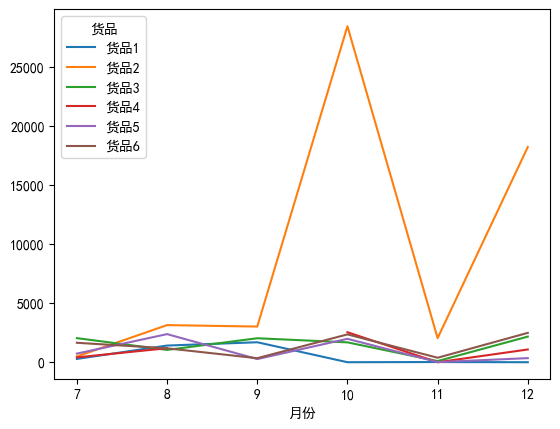

In [110]:
data1 = data.groupby(['月份','货品'])['数量'].sum().unstack()
data1.plot(kind='line')
#货品2在10月和12月份销量猛增。一因为加大销售力度，二因为开发了新市场

In [111]:
data1 = data.groupby(['销售区域','货品'])['数量'].sum().unstack()
data1
# 从销售区域看，每种货品销售区域都是1-3个区

货品,货品1,货品2,货品3,货品4,货品5,货品6
销售区域,,,,,,
华东,NaN,53811.0,NaN,NaN,NaN,NaN
华北,2827.0,NaN,9073.5,NaN,NaN,NaN
华南,579.0,NaN,NaN,NaN,NaN,NaN
泰国,NaN,NaN,NaN,NaN,5733.0,NaN
西北,11.0,NaN,NaN,5229.0,NaN,NaN
马来西亚,NaN,1510.0,NaN,NaN,NaN,8401.0


In [112]:
# 月份和区域维度
data1 = data.groupby(['月份','销售区域','货品'])['数量'].sum().unstack()
data1['货品2']
# 货品2在10月12月销量猛增，原因是在原有销售区，华东地区

月份  销售区域
7   华东        489.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚        2.0
8   华东       1640.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚     1503.0
9   华东       3019.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚        1.0
10  华东      28420.0
    华北          NaN
    泰国          NaN
    西北          NaN
    马来西亚        NaN
11  华东       2041.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚        1.0
12  华东      18202.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚        3.0
Name: 货品2, dtype: float64

In [125]:
# 商品是否存在质量问题
data['货品用户反馈'] = data['货品用户反馈'].str.strip() # 取出空格位
data1 = data.groupby(['货品','销售区域'])['货品用户反馈'].value_counts().unstack()
data1['拒货率'] = data1['拒货']/data1.sum(axis=1)
data1['返修率'] = data1['返修']/data1.sum(axis=1)
data1['合格率'] = data1['质量合格']/data1.sum(axis=1)

data1.sort_values(['合格率','返修率','拒货率'],ascending=False)
# 货品365合格率均较高，返修率低，质量过关。相反货品124合格率低，返修率高，质量不合格
#马来西亚对货品时效性要求高，拒货率高，按时交货率也低

货品用户反馈      拒货   质量合格    返修       拒货率       返修率       合格率
货品  销售区域                                                 
货品3 华北    31.0  188.0  19.0  0.130252  0.079788  0.789219
货品6 马来西亚  56.0  246.0  14.0  0.177215  0.044279  0.777936
货品5 泰国    14.0  144.0  29.0  0.074866  0.155018  0.769108
货品2 华东    72.0  184.0  51.0  0.234528  0.165997  0.598568
货品1 华南     5.0    4.0   2.0  0.454545  0.174603  0.343963
    西北     NaN    1.0   2.0       NaN  0.666667  0.272727
    华北     NaN    3.0  12.0       NaN  0.800000  0.189873
货品4 西北     NaN    9.0  49.0       NaN  0.844828  0.152945
货品2 马来西亚   6.0    1.0   3.0  0.600000  0.283019  0.091886